In [1]:
#line chrts  - works well with trends

# nothing like specially plt.line type of method exists in matplot lib, so we just have to use plt.plot

#lets prepare the data below (cycle hires - 'tfl-daily-cycle-hires.csv')

In [2]:
# lets import all necessary libraries first

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import style

In [3]:
tfl = pd.read_csv('tfl-daily-cycle-hires.csv')

In [4]:
tfl.head()

,Day,Number of Bicycle Hires,Unnamed: 2
0,30/07/2010,6897.0,NaN
1,31/07/2010,5564.0,NaN
2,01/08/2010,4303.0,NaN
3,02/08/2010,6642.0,NaN
4,03/08/2010,7966.0,NaN


In [5]:
#now, objective is to group Bicycle hire by year, so that we can plot it

In [6]:
tfl.dtypes

Day                         object
Number of Bicycle Hires    float64
Unnamed: 2                 float64
dtype: object

In [7]:
#hmm, so have to convert day in date format, lets do that using to_datetime

In [8]:
tfl['Day']=tfl['Day'].astype('datetime64[ns]')

C:\Users\Ankur\AppData\Local\Temp\ipykernel_19524\3839893689.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  tfl['Day']=tfl['Day'].astype('datetime64[ns]')


In [9]:
tfl.dtypes

Day                        datetime64[ns]
Number of Bicycle Hires           float64
Unnamed: 2                        float64
dtype: object

In [10]:
tfl['Day']=pd.to_datetime(tfl['Day'], format='%d/%m/%y')

In [11]:
tfl.dtypes

Day                        datetime64[ns]
Number of Bicycle Hires           float64
Unnamed: 2                        float64
dtype: object

In [12]:
 tfl.drop(columns='Unnamed: 2', inplace=True)

In [13]:
tfl.head()

,Day,Number of Bicycle Hires
0,2010-07-30,6897.0
1,2010-07-31,5564.0
2,2010-08-01,4303.0
3,2010-08-02,6642.0
4,2010-08-03,7966.0


In [14]:
#lets sort the Day value (ascending, by default)

In [15]:
tfl.sort_values('Day', inplace=True) #note its df.sort_values, not df.sort_value

In [16]:
tfl.dtypes

Day                        datetime64[ns]
Number of Bicycle Hires           float64
dtype: object

In [17]:
tfl['Year']=tfl['Day'].dt.strftime('%Y')

In [18]:
tfl.head()

,Day,Number of Bicycle Hires,Year
0,2010-07-30,6897.0,2010
1,2010-07-31,5564.0,2010
2,2010-08-01,4303.0,2010
3,2010-08-02,6642.0,2010
4,2010-08-03,7966.0,2010


In [19]:
#now we only want 'Year' & 'Number of Bicycle Hires' column, lets capture it in tfl_y

In [20]:
tfl_y=tfl[['Year', 'Number of Bicycle Hires']]

In [21]:
tfl_y.head()

,Year,Number of Bicycle Hires
0,2010,6897.0
1,2010,5564.0
2,2010,4303.0
3,2010,6642.0
4,2010,7966.0


In [22]:
#cool, almost there. now lets group by year & sum(Number of Bicycle Hires)

In [32]:
tfl_y=tfl_y.groupby(by='Year').sum()

In [33]:
tfl_y

Year
2010     2180813.0
2011     7142449.0
2012     9519283.0
2013     8045459.0
2014    10023897.0
2015     9871839.0
2016    10303637.0
2017    10446044.0
2018    10567540.0
2019    10424955.0
2020    10434167.0
2021     8214862.0
Name: Number of Bicycle Hires, dtype: float64

In [25]:
 #oh, lets reset the index so 'Year' is not the index

In [26]:
tfl_y.reset_index()

,Year,Number of Bicycle Hires
0,2010,2180813.0
1,2011,7142449.0
2,2012,9519283.0
3,2013,8045459.0
4,2014,10023897.0
5,2015,9871839.0
6,2016,10303637.0
7,2017,10446044.0
8,2018,10567540.0
9,2019,10424955.0


In [34]:
tfl_y

Year
2010     2180813.0
2011     7142449.0
2012     9519283.0
2013     8045459.0
2014    10023897.0
2015     9871839.0
2016    10303637.0
2017    10446044.0
2018    10567540.0
2019    10424955.0
2020    10434167.0
2021     8214862.0
Name: Number of Bicycle Hires, dtype: float64

In [27]:
#cool, so now we have prepared our data to plot line plot (year vs bike_hire)

KeyError: 'Year'

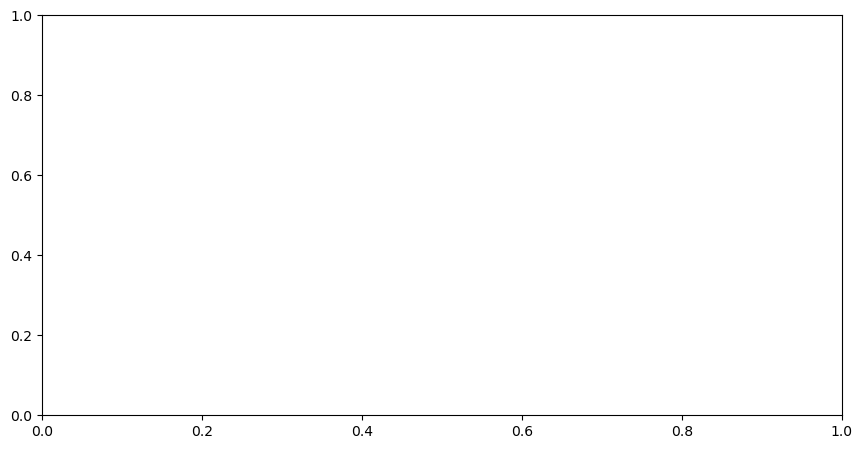

In [28]:
fig=plt.figure(figsize=(4,2))

ax1=fig.add_axes(rect=[0,0,2,2])

ax1.plot(tfl_y['Year'], tfl_y['Number of Bicycle Hires'])

plt.show()

In [35]:
#good error to learn..whats happening is tfl_y is not coming as dataFrame, if you look at [34], or 2-3 cells above

#this happened when we performed groupby, something went wrong, which was indexing thing, so what should we have done?...
# two things we could have done:
#...1st, either we shd have reset index along with group by, since we were assigning everything to tfl_y...
#..like this --> tfl_y=tfl_y.groupby(by='Year').sum().reset_index()
#..or 2nd, assign to tfl_y again, after we rest index, like this--> tfl_y = tfl_y.reset_index()
#anyways, lets fix it now, and then plot again ;)

In [36]:
tfl_y = tfl_y.reset_index()

In [37]:
tfl_y

,Year,Number of Bicycle Hires
0,2010,2180813.0
1,2011,7142449.0
2,2012,9519283.0
3,2013,8045459.0
4,2014,10023897.0
5,2015,9871839.0
6,2016,10303637.0
7,2017,10446044.0
8,2018,10567540.0
9,2019,10424955.0


In [38]:
#cool, its now fixed, and coming as proper DataFrame. lets splot now

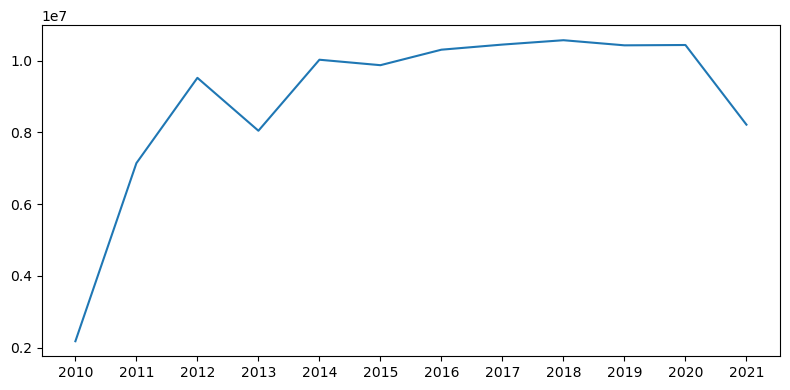

In [43]:
plt.figure(figsize=(8,4), tight_layout=True)

plt.plot(tfl_y['Year'], tfl_y['Number of Bicycle Hires'])

#plz note if we do--> plt.plot(x=tfl_y['Year'], y=tfl_y['Number of Bicycle Hires'])...this wont work as 1st two....
#...arguments are positional arguments, not keyword arguments

plt.show()

In [44]:
#lets do the same using subplot way,

#also this time we will change the way argument are inserted for plot....
#..so instead of --> plt.plot(tfl_y['Year'], tfl_y['Number of Bicycle Hires'])....
#..we will use --> ax.plot('Year', 'Number of Bicycle Hires', data=tfl_y)

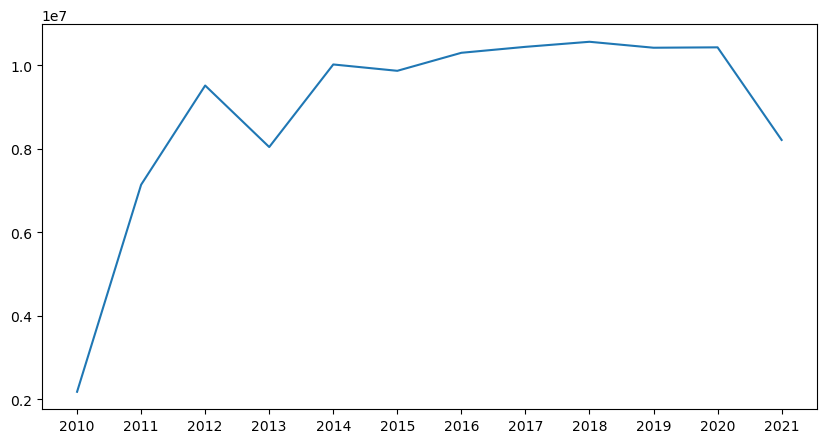

In [53]:
fig, ax=plt.subplots(1,1, figsize=(10,5)) 

ax.plot('Year', 'Number of Bicycle Hires', data=tfl_y)

#1st argument with plot is always 'x-axis', subsequent argument are 'measures', any thing further is keyword argument...
#...like data=tfl_y is keyword argument. so anything between this and x-axis are 'measures'.

plt.show()

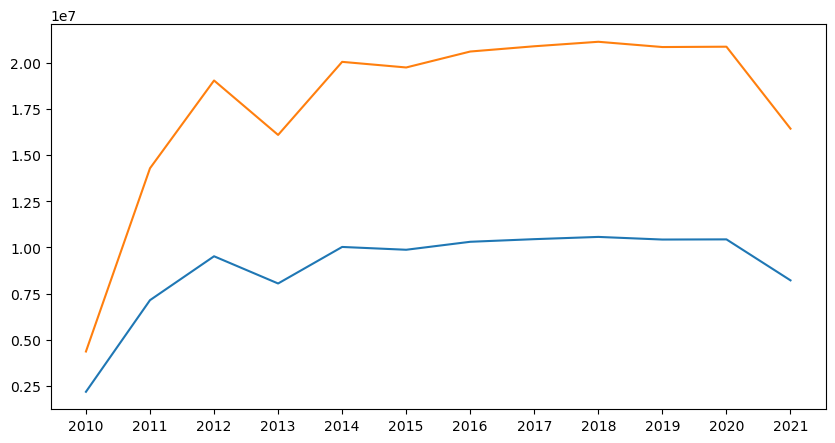

In [56]:
#lets insert 1-more measure ('Number of Bicycle Hires'*2)

fig, ax=plt.subplots(1,1, figsize=(10,5)) 

ax.plot('Year', 'Number of Bicycle Hires',tfl_y['Number of Bicycle Hires']*2, data=tfl_y)

plt.show()

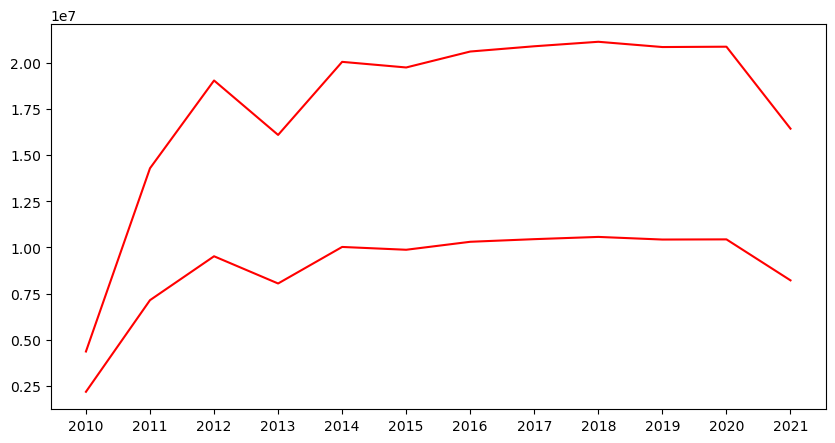

In [57]:
#lets insert 1-more measure ('Number of Bicycle Hires'*2)

fig, ax=plt.subplots(1,1, figsize=(10,5)) 

ax.plot('Year', 'Number of Bicycle Hires',tfl_y['Number of Bicycle Hires']*2, data=tfl_y, color='r')

plt.show()

In [58]:
#hmm, it looks like it colors both the lines/meaures in same color, to color both lines differently, we use..

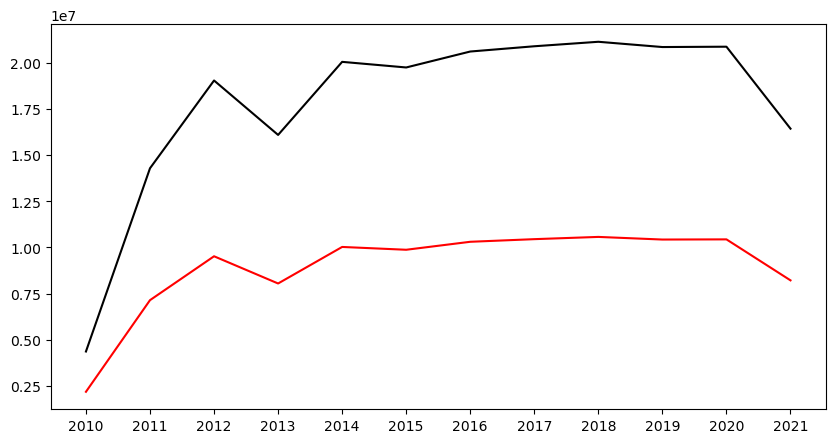

In [130]:
#lets insert 1-more measure ('Number of Bicycle Hires'*2)

fig, ax=plt.subplots(1,1, figsize=(10,5)) 

ax.plot('Year', 'Number of Bicycle Hires', data=tfl_y, color='r')

ax.plot(tfl_y['Year'], tfl_y['Number of Bicycle Hires']*2, color='k')

plt.show()

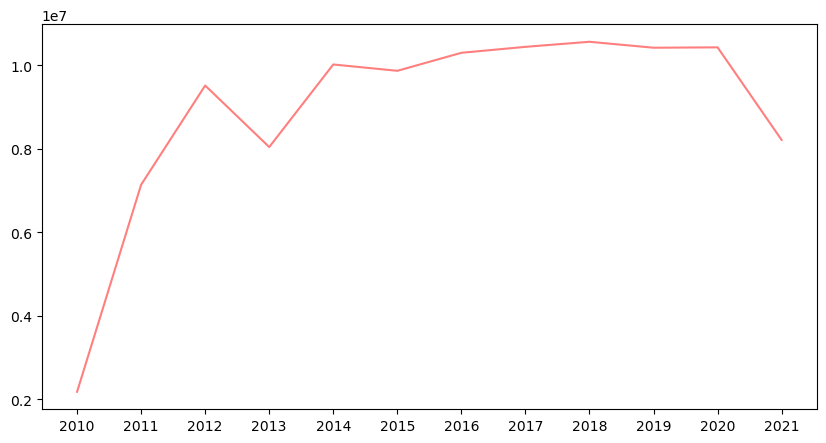

In [87]:
fig, ax=plt.subplots(1,1, figsize=(10,5)) 

#transparency of line: use alpha
ax.plot('Year', 'Number of Bicycle Hires', data=tfl_y, color='r', alpha=0.5)

plt.show()

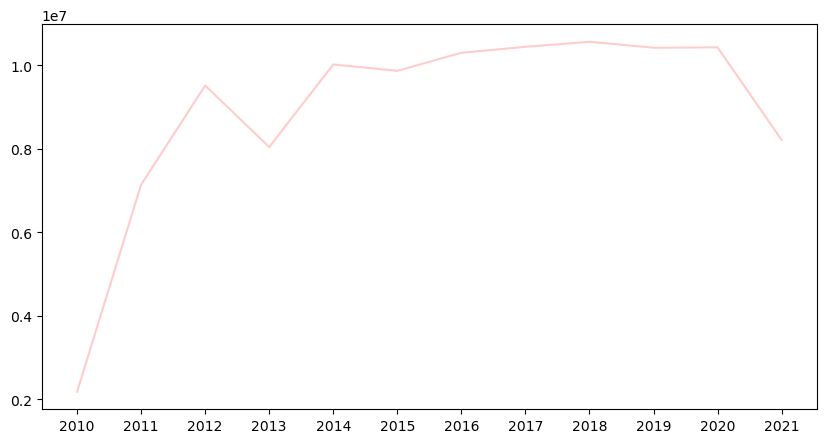

In [88]:
fig, ax=plt.subplots(1,1, figsize=(10,5)) 

#transparency of line: use alpha, smallest the alpha is, lighter the line (ranges between (0-1)
ax.plot('Year', 'Number of Bicycle Hires', data=tfl_y, color='r', alpha=0.2)

plt.show()

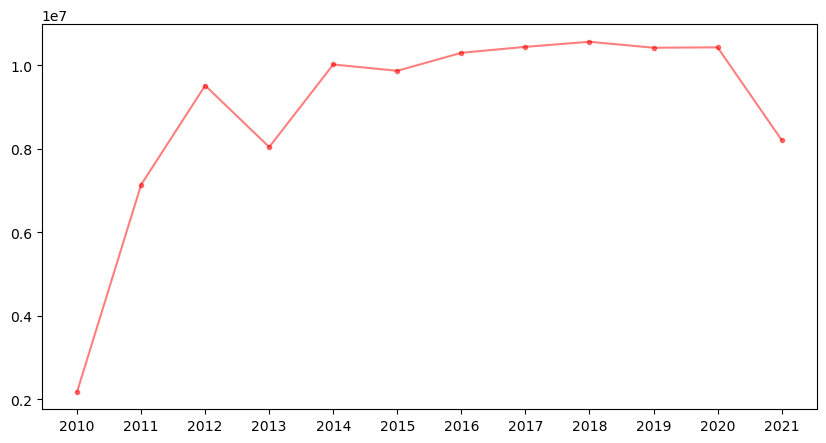

In [90]:
fig, ax=plt.subplots(1,1, figsize=(10,5)) 

#markers argument: refer to documentation for multiple marker style, lets see how to use it here:
ax.plot('Year', 'Number of Bicycle Hires', data=tfl_y, color='r', alpha=0.5, marker='.')

plt.show()

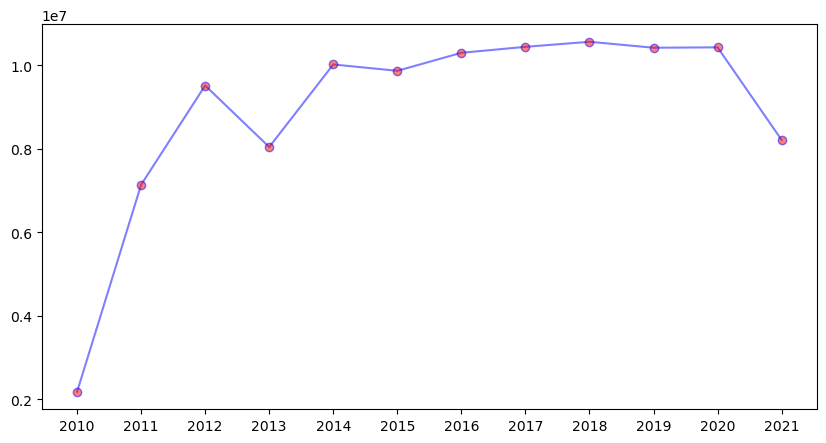

In [105]:
fig, ax=plt.subplots(1,1, figsize=(10,5)) 

# markersize argument: to increase/decrease marker size
ax.plot('Year', 'Number of Bicycle Hires', data=tfl_y, color='b', alpha=0.5, marker='o', markersize=6, markerfacecolor='r')

plt.show()

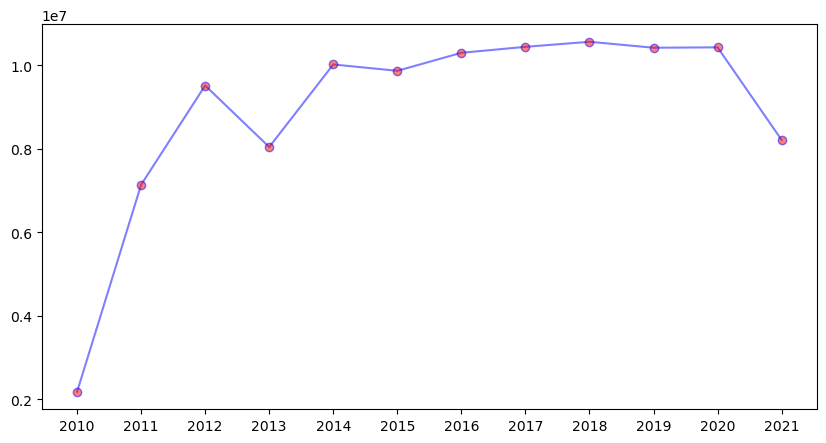

In [106]:
fig, ax=plt.subplots(1,1, figsize=(10,5)) 

# markerfacecolor argument: to increase/decrease marker size
ax.plot('Year', 'Number of Bicycle Hires', data=tfl_y, color='b', alpha=0.5, marker='o', markersize=6, markerfacecolor='r')

plt.show()

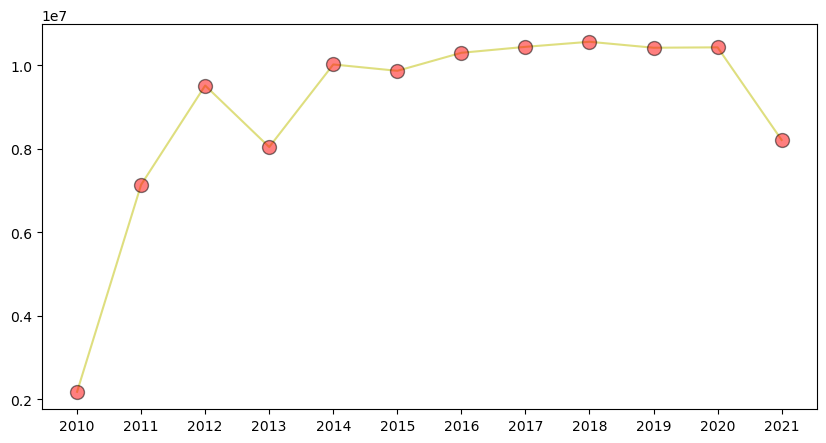

In [108]:
fig, ax=plt.subplots(1,1, figsize=(10,5)) 

# markersize can be shortened to ms; markerfacecolor to mfc & markeredgecolor to mec, so lets use to shorten
ax.plot('Year', 'Number of Bicycle Hires', data=tfl_y, color='y', alpha=0.5, marker='o', ms=10, mfc='r', mec='k')

plt.show()

In [109]:
#cool stuff with markers, lets look at some line styles (dotted, dashed etc)..refer documentation,lets see few here..

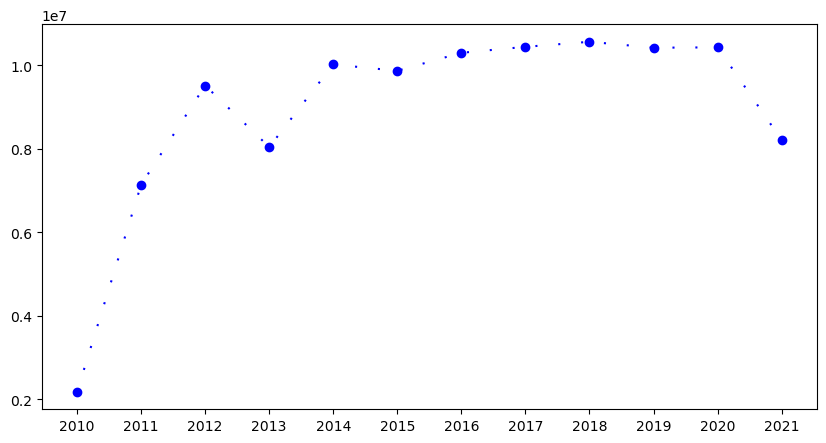

In [119]:
fig, ax=plt.subplots(1,1, figsize=(10,5)) 

#using linestyle argument
# lets plot loosely dotted line, code is (0,(1,10)), getting rid of markers to shorten the code

ax.plot('Year', 'Number of Bicycle Hires', data=tfl_y, color='b', alpha=1, marker='o', linestyle=(0,(1,10)))

plt.show()

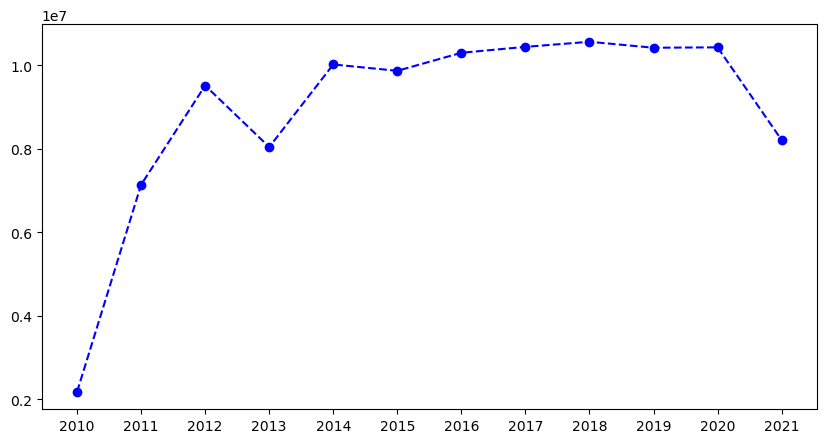

In [120]:
fig, ax=plt.subplots(1,1, figsize=(10,5)) 

#using linestyle argument
# lets plot dashed -- line, code is (0,(1,10)), getting rid of markers to shorten the code

ax.plot('Year', 'Number of Bicycle Hires', data=tfl_y, color='b', alpha=1, marker='o', linestyle='--')

plt.show()

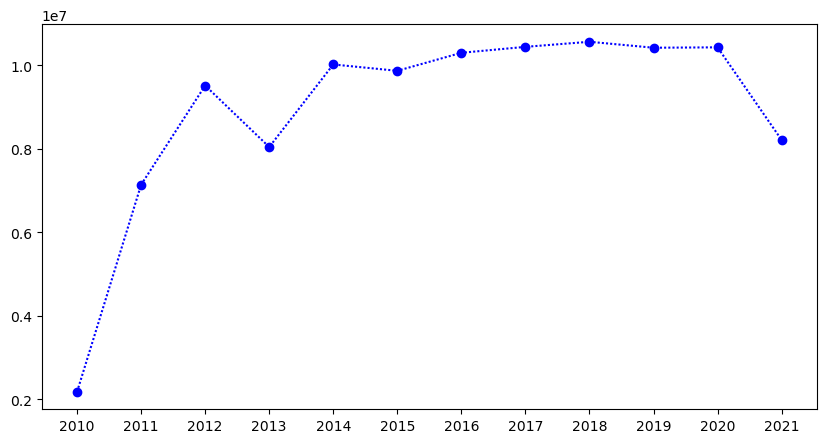

In [121]:
fig, ax=plt.subplots(1,1, figsize=(10,5)) 

#using linestyle argument
# lets plot dotted .. line, code is (0,(1,10)), getting rid of markers to shorten the code

ax.plot('Year', 'Number of Bicycle Hires', data=tfl_y, color='b', alpha=1, marker='o', linestyle=(0,(1,1)))

plt.show()

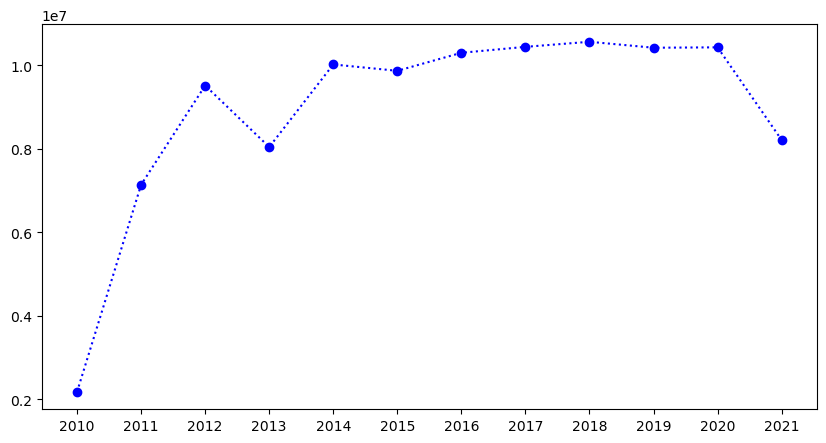

In [122]:
fig, ax=plt.subplots(1,1, figsize=(10,5)) 

#using linestyle argument
# lets plot loosely dotted .. line, code is (0,(1,10)), getting rid of markers to shorten the code

ax.plot('Year', 'Number of Bicycle Hires', data=tfl_y, color='b', alpha=1, marker='o', linestyle=':')

plt.show()

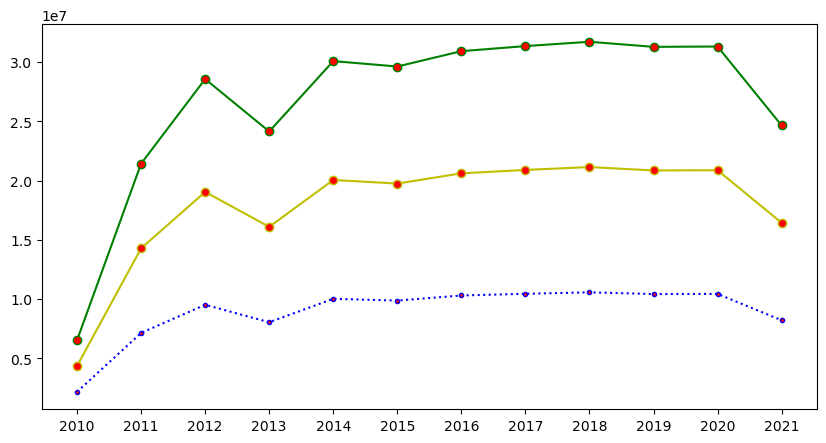

In [129]:
#to plot multiple lines of different style/design/variety for different measure:

fig, ax=plt.subplots(1,1, figsize=(10,5)) 

ax.plot('Year', 'Number of Bicycle Hires', data=tfl_y, color='b', label='bk_hire', marker='.', ms=6, mfc='r', linestyle=':')
ax.plot(tfl_y['Year'], tfl_y['Number of Bicycle Hires']*2, color='y', label='bk_2_hire', marker='o', ms=6, mfc='r')
ax.plot(tfl_y['Year'], tfl_y['Number of Bicycle Hires']*3, color='g', label='bk_3_hire', marker='o', ms=6, mfc='r')



plt.show()

In [ ]:
#refer to linestyle web-doc for much more styles:.. lets move on to next lecture 88*89 (fifa data sets 2 draw scatter plots)